# K Electronics Sales Analysis (2019)

#### Task 1: import necessary modules

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

#### Task 2: import the raw data

In [2]:
os.chdir("C:\\Users\Lenovo\\Documents\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")
csvs = os.listdir()
raw_df = []
for file in csvs:
    raw_df.append(pd.read_csv(file, header=0))

merged_raw_df = pd.concat(raw_df,ignore_index=True)
merged_raw_df = pd.DataFrame(merged_raw_df)

merged_raw_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Task 3: drop all NaN values

In [3]:
df = merged_raw_df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 4: remove invalid non NaN values

In [4]:
df = df[df["Product"]!="Product"]

#### Task 5: turn all data values into the correct data types

In [5]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)

In [6]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Task 5: add "Month" column

In [7]:
#keep in mind that "Order Date" is m/d/y H:M format
df["Month"] = df["Order Date"].str[0:2].astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 6: add "Sales" column

In [8]:
df["Sales"] = df["Quantity Ordered"]*df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 7: add "City" column

In [15]:
df["City"]=df["Purchase Address"].apply(lambda x: x.split(",")[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### Task 8: make "State" column and "City, State" column

In [24]:
df["State"]=df["Purchase Address"].apply(lambda x: x.split(",")[2].split(" ")[1])
df["City, State"]=df["City"]+", "+df["State"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,"City, State"
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA"


#### Task 9: make "Datetime" column

In [50]:
df["Datetime"]=pd.to_datetime(df["Order Date"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\2446942190.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Datetime"]=pd.to_datetime(df["Order Date"])


In [53]:
df["Hour"]=df["Datetime"].dt.hour

In [54]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,"City, State",Datetime,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",2019-04-30 09:27:00,9


#### Task 10: drop "Datetime" column

In [88]:
df = df.drop(columns="Datetime")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,"City, State",Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,"Dallas, TX",8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,"Boston, MA",22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,"Los Angeles, CA",9


### Question 1: What month got the most sales?

In [9]:
monthly_sales = df.groupby("Month").sum()["Sales"]

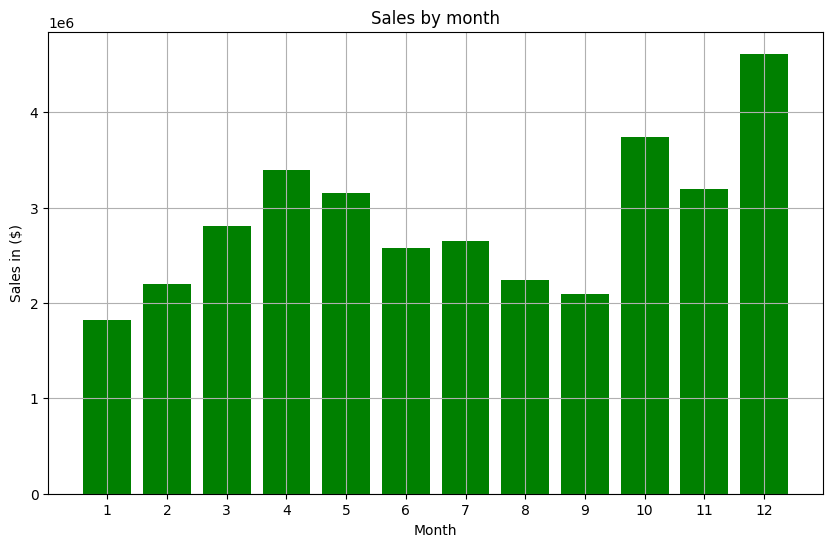

In [46]:
months = range(1,13)
plt.figure(figsize=(10,6))
plt.bar(months, [f for f in monthly_sales],color = "green")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in ($)")
plt.title("Sales by month")
plt.grid()
plt.show()

### Question 2: which City got the most sales?

In [26]:
city_sales = df.groupby("City, State").sum()["Sales"]

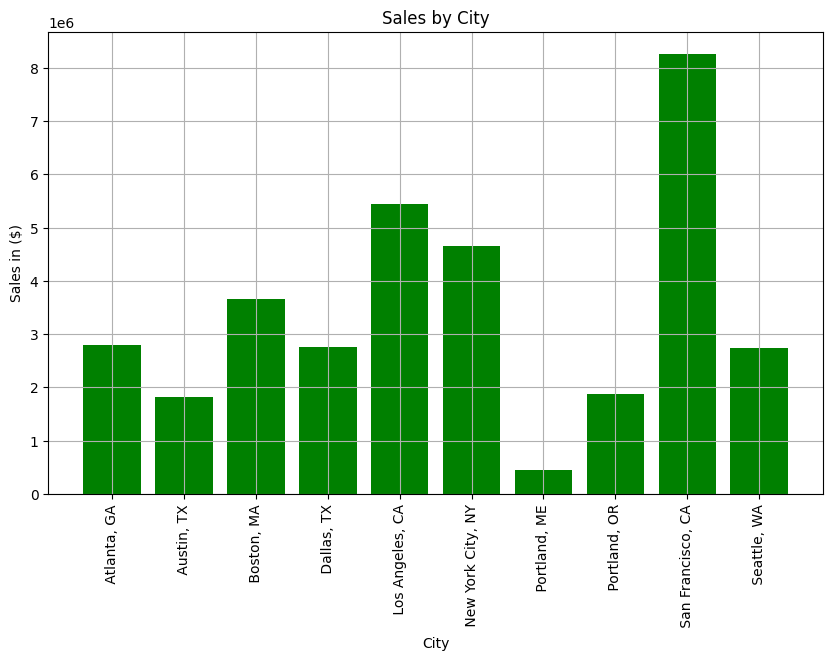

In [45]:
cities = [city for city, df in df.groupby("City, State")]

plt.figure(figsize=(10,6))
plt.bar(cities, [f for f in city_sales], color="green")
plt.xticks(cities, rotation='vertical')
plt.xlabel("City")
plt.ylabel("Sales in ($)")
plt.title("Sales by City")
plt.grid()
plt.show()

### Question 3: what is the best time for advertisement?

In [77]:
hourly_sales = df.groupby("Hour").sum()["Sales"]

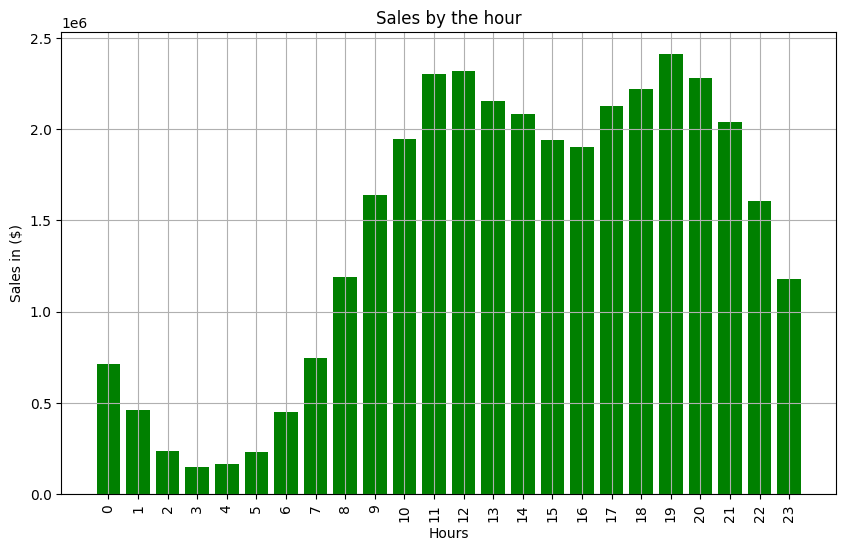

In [84]:
hours = [hour for hour,df in df.groupby("Hour")]

plt.figure(figsize=(10,6))
plt.bar(hours, [f for f in hourly_sales], color="green")
plt.xticks(hours, rotation='vertical')
plt.xlabel("Hours")
plt.ylabel("Sales in ($)")
plt.title("Sales by the hour")
plt.grid()
plt.show()

### Question 4: which product sold the most? and why?

In [93]:
product_quantity = df.groupby("Product").sum()["Quantity Ordered"]

In [127]:
prices = [price for price,df in df.groupby(["Product","Price Each"])]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\18639238.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([product for product,price in prices],rotation='vertical')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\18639238.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([product for product,price in prices],rotation='vertical')


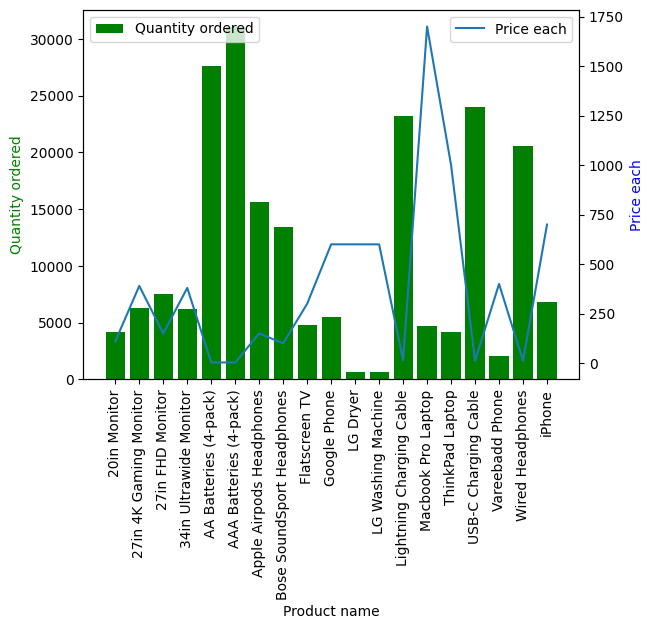

In [129]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar([product for product,price in prices], [product for product in product_quantity],label='Quantity ordered',color='green')
ax2.plot([product for product,price in prices], [price for product,price in prices], label='Price each')

ax1.set_xticklabels([product for product,price in prices],rotation='vertical')
ax2.set_xticklabels([product for product,price in prices],rotation='vertical')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered', color='green')
ax2.set_ylabel('Price each', color='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### Question 5: which product pairs sold the most?

In [178]:
pair_df = df[df["Order ID"].duplicated(keep=False)]
pair_df["Grouped"]=pair_df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
pair_df=pair_df[["Order ID", "Grouped"]].drop_duplicates()
pair_df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\3510128267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df["Grouped"]=pair_df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [180]:
from itertools import combinations
from collections import Counter

In [181]:
count = Counter()
for row in pair_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]